In [15]:
%matplotlib inline

In [16]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import reverse_geocoder
from os import listdir
from os.path import isfile, join

### Inputs

In [41]:
### Returns an array of True/False if the coordinate is in a given state
### coordinates: An array of coordinates
### state: Full name of the state. ex= "New York"
def get_coordinates_in_state(coordinates, state):
    coords = [(lat,long) for lat,long,ele in coordinates]
    results = reverse_geocoder.search(coords, mode=2)
    state = [x['admin1']==state for x in results]
    return state

In [47]:
img_dir = "../data/images/"
data_dir = "../data/"
img_files = [f for f in listdir(img_dir) if isfile(join(img_dir, f))] # Names of all images in the folder
coordinates = loadmat(data_dir + "GPS_Long_Lat_Compass.mat")["GPS_Compass"] # Coordinates. Each coordinate corresponds to 6 pictures
in_ny = get_coordinates_in_state(coordinates=coordinates, state="New York") # All coordinates in NY
in_ny[:5]

[False, False, False, False, False]

In [57]:
data = []
img_idx = 0;
for i in range(len(coordinates)):
    data.append([coordinates[i],img_files[img_idx]])
    data.append([coordinates[i],img_files[img_idx+1]])
    data.append([coordinates[i],img_files[img_idx+2]])
    data.append([coordinates[i],img_files[img_idx+3]])
    data.append([coordinates[i],img_files[img_idx+4]])
    data.append([coordinates[i],img_files[img_idx+5]])
    img_idx+=6
    
data[:10]

[[array([ 40.440309, -80.      , 115.74    ]), '000001_0.jpg'],
 [array([ 40.440309, -80.      , 115.74    ]), '000001_1.jpg'],
 [array([ 40.440309, -80.      , 115.74    ]), '000001_2.jpg'],
 [array([ 40.440309, -80.      , 115.74    ]), '000001_3.jpg'],
 [array([ 40.440309, -80.      , 115.74    ]), '000001_4.jpg'],
 [array([ 40.440309, -80.      , 115.74    ]), '000001_5.jpg'],
 [array([ 40.440271, -80.0068  , 119.24    ]), '000002_0.jpg'],
 [array([ 40.440271, -80.0068  , 119.24    ]), '000002_1.jpg'],
 [array([ 40.440271, -80.0068  , 119.24    ]), '000002_2.jpg'],
 [array([ 40.440271, -80.0068  , 119.24    ]), '000002_3.jpg']]

In [55]:
ny_img = [data[i] for i in range(len(data)) if in_ny[i]]
len(ny_img)*6

28386

In [54]:
ny_img[:5]

[[array([ 40.74847 , -73.971083, 300.12    ]),
  '004403_0.jpg',
  '004403_1.jpg',
  '004403_2.jpg',
  '004403_3.jpg',
  '004403_4.jpg',
  '004403_4.jpg',
  '004403_5.jpg'],
 [array([ 40.748518, -73.971197, 300.12    ]),
  '004404_0.jpg',
  '004404_1.jpg',
  '004404_2.jpg',
  '004404_3.jpg',
  '004404_4.jpg',
  '004404_4.jpg',
  '004404_5.jpg'],
 [array([ 40.748566, -73.971308, 300.12    ]),
  '004405_0.jpg',
  '004405_1.jpg',
  '004405_2.jpg',
  '004405_3.jpg',
  '004405_4.jpg',
  '004405_4.jpg',
  '004405_5.jpg'],
 [array([ 40.748611, -73.971414, 300.12    ]),
  '004406_0.jpg',
  '004406_1.jpg',
  '004406_2.jpg',
  '004406_3.jpg',
  '004406_4.jpg',
  '004406_4.jpg',
  '004406_5.jpg'],
 [array([ 40.748656, -73.971518, 300.12    ]),
  '004407_0.jpg',
  '004407_1.jpg',
  '004407_2.jpg',
  '004407_3.jpg',
  '004407_4.jpg',
  '004407_4.jpg',
  '004407_5.jpg']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


### Inspect some images



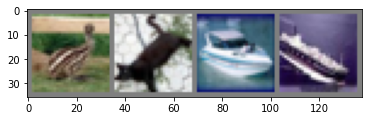

bird  cat   ship  ship 


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

2. Define a Convolutional Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

4. Train the network
^^^^^^^^^^^^^^^^^^^^

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [7]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.200
[1,  4000] loss: 1.892
[1,  6000] loss: 1.691
[1,  8000] loss: 1.574
[1, 10000] loss: 1.506
[1, 12000] loss: 1.473
[2,  2000] loss: 1.393
[2,  4000] loss: 1.373
[2,  6000] loss: 1.335
[2,  8000] loss: 1.341
[2, 10000] loss: 1.310
[2, 12000] loss: 1.284
Finished Training


Let's quickly save our trained model:



In [8]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

See `here <https://pytorch.org/docs/stable/notes/serialization.html>`_
for more details on saving PyTorch models.

5. Test the network on the test data
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



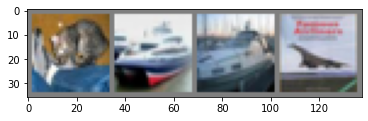

GroundTruth:  cat   ship  ship  plane


In [9]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

Next, let's load back in our saved model (note: saving and re-loading the model
wasn't necessary here, we only did it to illustrate how to do so):



In [10]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Okay, now let us see what the neural network thinks these examples above are:



In [11]:
outputs = net(images)

The outputs are energies for the 10 classes.
The higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [12]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  ship  plane


The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [15]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        outputs = outputs.to(device)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 54 %


That looks way better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [16]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 65.7 %
Accuracy for class: car   is 63.5 %
Accuracy for class: bird  is 51.2 %
Accuracy for class: cat   is 16.4 %
Accuracy for class: deer  is 50.6 %
Accuracy for class: dog   is 51.8 %
Accuracy for class: frog  is 67.2 %
Accuracy for class: horse is 56.6 %
Accuracy for class: ship  is 66.8 %
Accuracy for class: truck is 58.5 %
